In [53]:
import pandas as pd

import numpy as np
import warnings
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from lifelines import CoxPHFitter 
from lifelines.plotting import plot_lifetimes 
from lifelines import NelsonAalenFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.utils import datetimes_to_durations
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve 




import seaborn as sns
import datetime
import math

plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


%matplotlib inline



In [32]:
data = pd.read_csv('exporting 20201124.csv',index_col=0)

<AxesSubplot:>

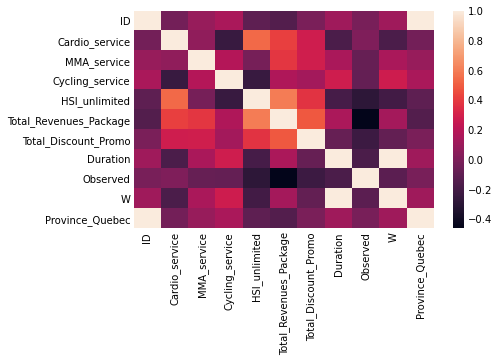

In [52]:
sns.heatmap(data.corr())

# KMF

<lifelines.KaplanMeierFitter:"modeling late entries", fitted with 10000 total observations, 6682 right-censored observations>

<AxesSubplot:xlabel='timeline'>

<lifelines.KaplanMeierFitter:"ignoring late entries", fitted with 10000 total observations, 6682 right-censored observations>

<AxesSubplot:xlabel='timeline'>

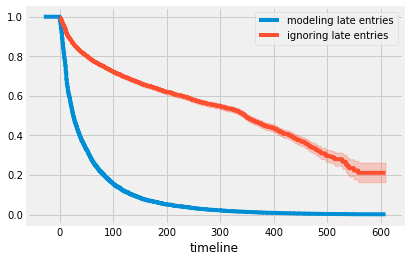

In [55]:
from lifelines import KaplanMeierFitter    

kmf = KaplanMeierFitter()
kmf.fit(data["Duration"], event_observed=data["Observed"], entry=data["W"], label='modeling late entries')
kmf.plot()
kmf.fit(data["Duration"], event_observed=data["Observed"], label='ignoring late entries')
kmf.plot()

# CPH 

In [40]:
## CPH ( modeling late entries)

cph = CoxPHFitter(penalizer=1)
cph.fit(data.drop('ID',axis=1), 'Duration', 'Observed',entry_col='W',step_size =0.3,show_progress=True)
print ('CONCORDANCE')
cph.concordance_index_

Iteration 1: norm_delta = 0.21636, step_size = 0.3000, log_lik = -22375.76653, newton_decrement = 348.81726, seconds_since_start = 0.2
Iteration 2: norm_delta = 0.15111, step_size = 0.3000, log_lik = -22197.88050, newton_decrement = 170.78436, seconds_since_start = 0.5
Iteration 3: norm_delta = 0.10576, step_size = 0.3000, log_lik = -22110.77688, newton_decrement = 83.79670, seconds_since_start = 0.7
Iteration 4: norm_delta = 0.06459, step_size = 0.3900, log_lik = -22058.15410, newton_decrement = 31.27302, seconds_since_start = 0.9
Iteration 5: norm_delta = 0.03190, step_size = 0.5070, log_lik = -22034.47662, newton_decrement = 7.63344, seconds_since_start = 1.2
Iteration 6: norm_delta = 0.01090, step_size = 0.6591, log_lik = -22027.72847, newton_decrement = 0.89153, seconds_since_start = 1.4
Iteration 7: norm_delta = 0.00156, step_size = 0.8568, log_lik = -22026.85503, newton_decrement = 0.01838, seconds_since_start = 1.7
Iteration 8: norm_delta = 0.00000, step_size = 1.0000, log_lik 

<lifelines.CoxPHFitter: fitted with 10000 total observations, 6682 right-censored observations>

CONCORDANCE


0.7139590141994505

In [41]:
## CPH (ignoring late entries)
cph_wole = CoxPHFitter(penalizer=1)
cph_wole.fit(data.drop('ID',axis=1), 'Duration', 'Observed',step_size =0.3,show_progress=True)
print ('CONCORDANCE')

cph_wole.concordance_index_

Iteration 1: norm_delta = 0.32587, step_size = 0.3000, log_lik = -28041.71326, newton_decrement = 718.67894, seconds_since_start = 0.1
Iteration 2: norm_delta = 0.22991, step_size = 0.3000, log_lik = -27675.04453, newton_decrement = 355.63187, seconds_since_start = 0.2
Iteration 3: norm_delta = 0.16197, step_size = 0.3000, log_lik = -27493.61448, newton_decrement = 175.64435, seconds_since_start = 0.3
Iteration 4: norm_delta = 0.09949, step_size = 0.3900, log_lik = -27383.27924, newton_decrement = 65.94889, seconds_since_start = 0.5
Iteration 5: norm_delta = 0.04939, step_size = 0.5070, log_lik = -27333.33308, newton_decrement = 16.18120, seconds_since_start = 0.6
Iteration 6: norm_delta = 0.01694, step_size = 0.6591, log_lik = -27319.02502, newton_decrement = 1.89788, seconds_since_start = 0.7
Iteration 7: norm_delta = 0.00244, step_size = 0.8568, log_lik = -27317.16538, newton_decrement = 0.03930, seconds_since_start = 0.8
Iteration 8: norm_delta = 0.00000, step_size = 1.0000, log_li

<lifelines.CoxPHFitter: fitted with 10000 total observations, 6682 right-censored observations>

CONCORDANCE


0.8568638755558113

<AxesSubplot:>

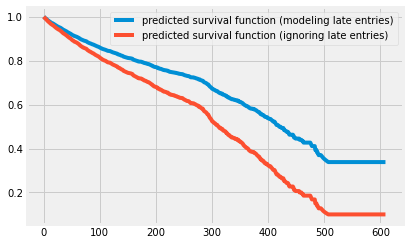

In [59]:
censored_subjects  = data.loc[data['Observed']==0]
censored_subjects.set_index('ID',drop=False,inplace=True)
sample_customer = censored_subjects.sample()
ax=cph.predict_survival_function(sample_customer, conditional_after=sample_customer['Duration']).plot()
cph_wole.predict_survival_function(sample_customer, conditional_after=sample_customer['Duration']).plot(ax=ax)

ax.legend(['predicted survival function (modeling late entries)', 'predicted survival function (ignoring late entries)'])
